In [217]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import seaborn as sns

In [218]:
from fractions import Fraction

def P(event, space): 
    "The probability of an event, given a sample space."
    return Fraction(cases(favorable(event, space)), 
                    cases(space))

favorable = set.intersection # Outcomes that are in the event and in the sample space
cases     = len              # The number of cases is the length, or size, of a set

## Ejemplo 1
Sea $X$ el lanzamiento de una moneda y $Y$ el lanzamiento de un dado:
* Determine $𝑆_𝑋$, $𝑆_𝑌$ y $𝑆_{𝑋𝑌}$
* Dibuje la PMF conjunta ($𝑃_{𝑋𝑌}(𝑥,𝑦)$).
* Si se define un evento $𝐴=\{𝑋+𝑌=3\}$ y $𝐵=\{min⁡(𝑋,𝑌)=1\}$. Encuentre $𝑃[𝐴]$ y $𝑃[𝐵]$


Determine $𝑆_𝑋$, $𝑆_𝑌$ y $𝑆_{𝑋𝑌}$

In [219]:
Sx = [0, 1]   # Rango lanzamiento moneda
Sy = [1, 2, 3, 4, 5, 6]    # Rango lanzamiento de dados
Sxy = list(itertools.product(Sx, Sy))

# https://www.pythoncheatsheet.org/modules/itertools-module
Sx = [0, 1]
print(f"Sx: {Sx}") 
print(f"Sy: {Sy}") 
print(f"Sxy: {Sxy}") 

Sx: [0, 1]
Sy: [1, 2, 3, 4, 5, 6]
Sxy: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]


Dibuje la PMF conjunta ($𝑃_{𝑋𝑌}(𝑥,𝑦)$)

In [220]:
# Empty dataframe
PMF = pd.DataFrame(columns = Sy, 
                   index = Sx)

# Llenado del dataframe
PMF = PMF.reset_index()
# print(PMF.index)
# print(PMF.columns)
print()
k = 0

for i in PMF.index:
    for j in PMF.columns[1:]:
        PMF.loc[i, j] = Fraction(len(Sxy[k]),len(Sxy))        
        k += 1
PMF

,index,1,2,3,4,5,6
0,0,1/6,1/6,1/6,1/6,1/6,1/6
1,1,1/6,1/6,1/6,1/6,1/6,1/6


[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]
[Fraction(1, 6), Fraction(1, 6), Fraction(1, 6), Fraction(1, 6), Fraction(1, 6), Fraction(1, 6), Fraction(1, 6), Fraction(1, 6), Fraction(1, 6), Fraction(1, 6), Fraction(1, 6), Fraction(1, 6)]


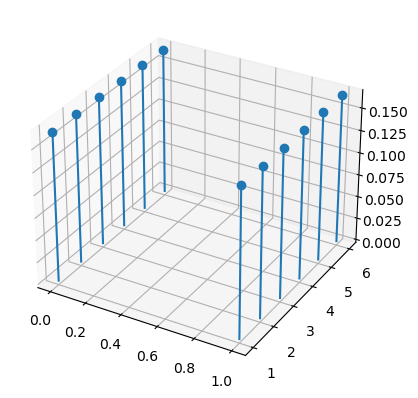

In [221]:
# Grafica
import matplotlib.pyplot as plt
x = []
y = []
z = []
for i in range(len(Sx)):
    for j in range(len(Sy)):
        x.append(Sx[i])
        y.append(Sy[j])
        z.append(PMF.loc[Sx[i], Sy[j]])

print(x)
print(y)
print(z)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
(markerline, stemlines, baseline) = ax.stem(x,y,z)
plt.setp(baseline, visible=False)
plt.show()


In [222]:
x_str = [int(i) for i in x]
y_str = [int(i) for i in y]
Pxy = [float(p) for p in z]
print(x_str)
print(y_str)
print(Pxy)
PMF2 = pd.DataFrame(data = {"X": x_str,
                            "Y": y_str,
                            "Pxy": Pxy,
                            })

PMF2 = PMF2.pivot(index=["X"],columns=["Y"],values=["Pxy"])
PMF2


[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]
[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


Pxy                                                  
Y         1         2         3         4         5         6
X                                                            
0  0.166667  0.166667  0.166667  0.166667  0.166667  0.166667
1  0.166667  0.166667  0.166667  0.166667  0.166667  0.166667

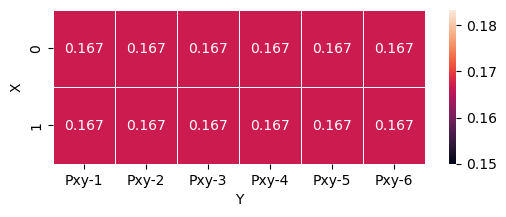

In [223]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(6, 2))

sns.heatmap(PMF2, annot=True, fmt=".3f", linewidths=.5, ax=ax)
ax.set_xlabel("Y")
ax.set_ylabel("X")
plt.show()

## Referencias
1. http://prob140.org/textbook/content/Chapter_04/00_Relations_Between_Variables.html
2. https://github.com/norvig/pytudes#pytudes-index-of-jupyter-ipython-notebooks
3. https://stanford-cs221.github.io/spring2020/
4. https://colab.research.google.com/github/norvig/pytudes/blob/main/ipynb/flipping.ipynb
5. https://colab.research.google.com/github/norvig/pytudes/blob/main/ipynb/poker.ipynb
6. https://colab.research.google.com/github/norvig/pytudes/blob/main/ipynb/Coin%20Flip.ipynb
7. https://colab.research.google.com/github/norvig/pytudes/blob/main/ipynb/ProbabilitySimulation.ipynb
8. https://colab.research.google.com/github/norvig/pytudes/blob/main/ipynb/ProbabilityParadox.ipynb
9. https://colab.research.google.com/github/norvig/pytudes/blob/main/ipynb/Probability.ipynb
10. https://github.com/tirthajyoti/Stats-Maths-with-Python/blob/master/Prob_Distributions_Discrete.ipynb
11. https://github.com/aimacode/aima-python/blob/master/probability4e.ipynb
12. https://github.com/statistics-exercises
13. https://www.geeksforgeeks.org/matplotlib-pyplot-matshow-in-python/
14. https://inferentialthinking.com/chapters/06/Tables.html
15. http://www.data8.org/datascience/tutorial.html
